<a href="https://colab.research.google.com/github/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/demo_starting_python_E%26P_1hour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo: Starting Python for Exploration and Production in 1 Hour

**Created by:** *Yohanes Nuwara*

This notebook is used for personal demonstration in my technical talk and knowledge sharing sessions. 



## Demo 0: Kickstarting

This session demonstrate how to use Google Colab (switching from CPU to GPU vice versa, connecting to runtime, scripting, and running the cell)

In [ ]:
print('hello world')

hello world


In [ ]:
a = 10

if a > 5:
  b = a**2
  print(b)
if a <= 5:
  b = 1 / a
  print(b)

100


## Demo 1: Python and its Effectiveness

This session demonstrate how to apply list comprehension to solve problems in engineering fast, easily, and effectively i.e. to reduce the lines of codes. 

In the example below, we want to compute the difference between two consecutive elements in an array

In [ ]:
# create array
array = [13, 56, 78, 23, 45, 67, 82, 34, 25, 66, 23, 12, 45, 56, 78, 89]

In [ ]:
# NOT using LIST COMPREHENSION
difference = []

for i, j in zip(range(0, len(array)-1), range(1, len(array))):
  diff = array[j] - array[i]
  # append result of each iter to the blank array
  difference.append(diff)

print(difference)

[43, 22, -55, 22, 22, 15, -48, -9, 41, -43, -11, 33, 11, 22, 11]


In [ ]:
# using LIST COMPREHENSION
difference = [j-i for i, j in zip(array[:-1], array[1:])]
print(difference)

[43, 22, -55, 22, 22, 15, -48, -9, 41, -43, -11, 33, 11, 22, 11]


## Demo 2: Numpy, Matplotlib, and Pandas

This session demonstrate how to use Numpy, Matplotlib, and Pandas libraries, and to guarantee that if you master these libraries, you will master how to solve engineering problems with Python. 

In the example below, we use Numpy to create array of x and y trigonometric function, Matplotlib to visualize the function, and Pandas to convert the data into a dataframe. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Numpy

## create x array
x = np.arange(0, 370, 10)

## compute sine and cosine from x array
ysin = np.sin(np.deg2rad(x))
ycos = np.cos(np.deg2rad(x))

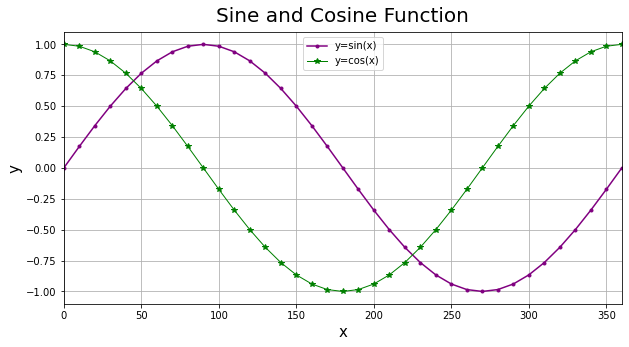

In [ ]:
# Matplotlib

## resize the plot
plt.figure(figsize=(10,5))

## plot, specify color, linetype, linewidth, and give labels 
plt.plot(x, ysin, '.-', color='purple', label='y=sin(x)')
plt.plot(x, ycos, '*-', color='green', linewidth=1, label='y=cos(x)')

## give title, with size and pad
plt.title('Sine and Cosine Function', size=20, pad=10)

## give labels, with size
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)

## limit the axes
plt.xlim(0, 360)

## show the legends and specify its location in the plot
plt.legend(loc='upper center')

## show the grids
plt.grid()

plt.show()

In [ ]:
# Pandas

## create dataframe
df = pd.DataFrame({'x': x, 'sin(x)': ysin, 'cos(x)': ycos})

## display the first 10 rows
df.head(10)

,x,sin(x),cos(x)
0,0,0.000000,1.000000e+00
1,10,0.173648,9.848078e-01
2,20,0.342020,9.396926e-01
3,30,0.500000,8.660254e-01
4,40,0.642788,7.660444e-01
5,50,0.766044,6.427876e-01
6,60,0.866025,5.000000e-01
7,70,0.939693,3.420201e-01
8,80,0.984808,1.736482e-01
9,90,1.000000,6.123234e-17


## Demo 3: Access Exploration Open Dataset

This session demonstrates how to stream EXPLORATION open dataset from a website directly to Google Colab (without downloading to our PC) and open the data quickly. 

In the example below, we access a well-log dataset from the KGS web data repository, use Lasio to read the data, and display it. 

In [ ]:
# get dataset from the open repo website (e.g. KGS)
!wget 'http://www.kgs.ku.edu/PRS/Scans/Log_Summary/2020.zip'

--2020-10-15 10:03:39--  http://www.kgs.ku.edu/PRS/Scans/Log_Summary/2020.zip
Resolving www.kgs.ku.edu (www.kgs.ku.edu)... 129.237.140.42
Connecting to www.kgs.ku.edu (www.kgs.ku.edu)|129.237.140.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107287088 (102M) [application/zip]
Saving to: ‘2020.zip’

2020.zip            100%[===================>] 102.32M  11.0MB/s    in 11s     

2020-10-15 10:03:50 (9.37 MB/s) - ‘2020.zip’ saved [107287088/107287088]



In [ ]:
# unzip file and store to directory "KGS"
!unzip '/content/2020.zip' -d '/content/KGS'
!unzip '/content/KGS/1051325649.zip' -d '/content/KGS/logs'

In [ ]:
# install Lasio library to read well log data
!pip install lasio

In [ ]:
# use Lasio
import lasio

# read well log data
well = lasio.read('/content/KGS/logs/1051325649.las')

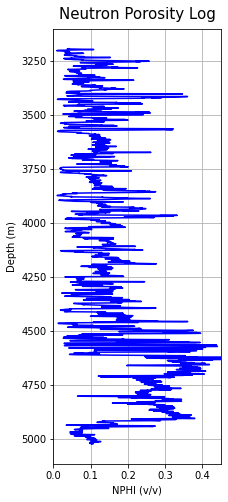

In [ ]:
plt.figure(figsize=(3,8)) # chart size

plt.plot(well['NPHI'], well['DEPT'], color='blue') # plot the data
plt.title('Neutron Porosity Log', size=15, pad=10)
plt.xlabel("NPHI (v/v)"); plt.ylabel("Depth (m)") # labels
plt.xlim(0, 0.45)
plt.grid(True) # give chart grids
plt.gca().invert_yaxis() # invert y-axis
plt.show()

## Demo 4: Access Production Open Dataset

This session demonstrates how to stream PRODUCTION open dataset from a website directly to Google Colab (without downloading to our PC) and open the data quickly.

In the example below, we access a production history data of the Volve field in North Sea from an available database in Zenodo (Alfonso Reyes), and display the production plot. 

In [ ]:
# get the dataset from the open repo website (e.g. Volve Zenodo repo)
!wget 'https://zenodo.org/record/2596620/files/f0nzie/volve_eclipse_reservoir-v0.1.zip'

--2020-10-05 05:54:16--  https://zenodo.org/record/2596620/files/f0nzie/volve_eclipse_reservoir-v0.1.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29500106 (28M) [application/octet-stream]
Saving to: ‘volve_eclipse_reservoir-v0.1.zip’

volve_eclipse_reser 100%[===================>]  28.13M  79.4MB/s    in 0.4s    

2020-10-05 05:54:17 (79.4 MB/s) - ‘volve_eclipse_reservoir-v0.1.zip’ saved [29500106/29500106]



In [ ]:
# unzip the zip file
!unzip '/content/volve_eclipse_reservoir-v0.1.zip' -d '/content/Volve'

In [ ]:
# define the filepath of production data in Excel file
filepath = '/content/Volve/f0nzie-volve_eclipse_reservoir-413a669/inst/rawdata/Volve production data.xlsx'

# read excel from the above filepath
df = pd.read_excel(filepath, sheet_name='Monthly Production Data')

# output the last 10 rows of the dataframe
df.head(10)

,Wellbore name,NPDCode,Year,Month,On Stream,Oil,Gas,Water,GI,WI
0,15/9-F-4,5693.0,2007.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
1,15/9-F-5,5769.0,2007.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2,15/9-F-4,5693.0,2007.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,15/9-F-5,5769.0,2007.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,15/9-F-4,5693.0,2007.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
5,15/9-F-5,5769.0,2007.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
6,15/9-F-4,5693.0,2007.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
7,15/9-F-5,5769.0,2007.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
8,15/9-F-4,5693.0,2008.0,1.0,0,NaN,NaN,NaN,NaN,NaN
9,15/9-F-5,5769.0,2008.0,1.0,0,NaN,NaN,NaN,NaN,NaN


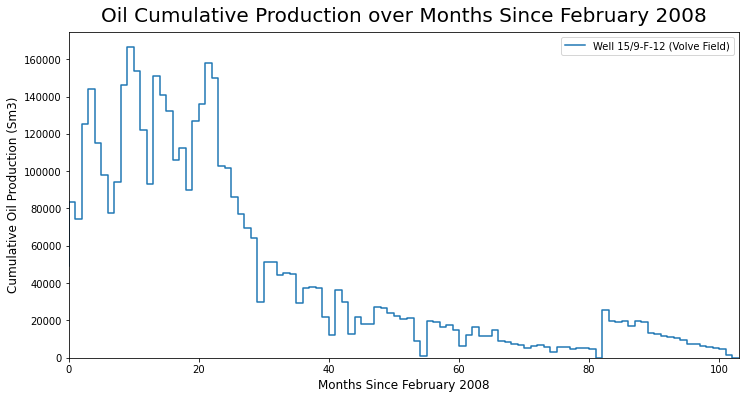

In [ ]:
# select only data of well 15/9-F-12
well_prod = df[df['Wellbore name']=='15/9-F-12']

# make array of months
t = np.arange(len(well_prod))

# specify row contains oil cum. prod.
Np = well_prod['Oil']

# plot oil cum. prod vs month
plt.figure(figsize=(12,6))

plt.step(t, Np, label='Well 15/9-F-12 (Volve Field)')
plt.title('Oil Cumulative Production over Months Since February 2008', size=20, pad=10)
plt.xlim(min(t), max(t)); plt.ylim(ymin=0)
plt.xlabel('Months Since February 2008', size=12)
plt.ylabel('Cumulative Oil Production (Sm3)', size=12)

plt.legend()
plt.show()